##  Metadata

- Course: Signals and Systems — Programming Section (Python)  
- Full Name: Melina Vaghefi  
- Student ID: 402121983  
- Source: Signals and Systems Laboratory with MATLAB  
- Problem Number (Chapter.section.question_num): 6.9.7

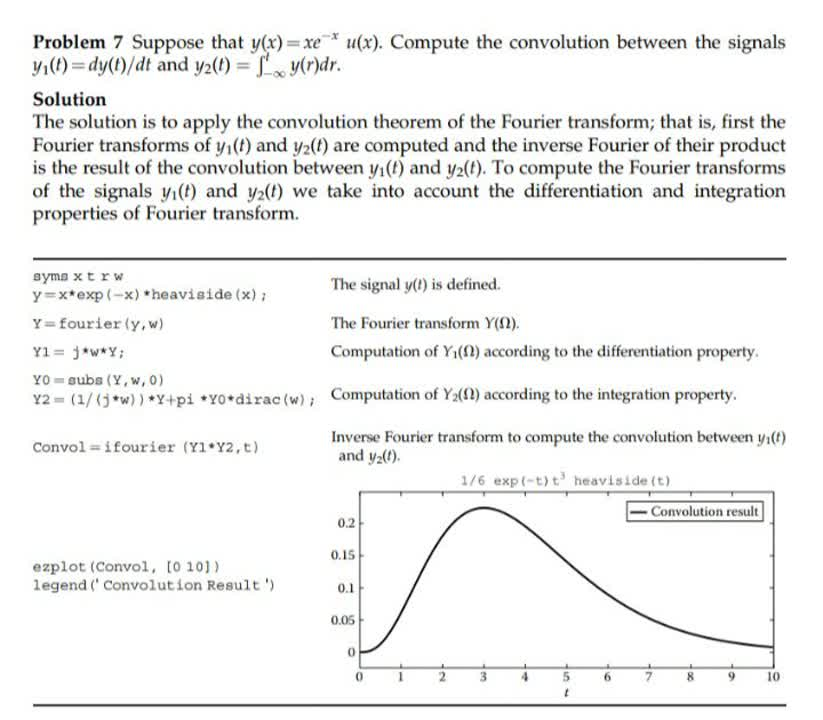

##  Problem Assumptions

- Given signal: \( y(t) = t e^{-t} u(t) \)  
- We need to compute the convolution between:  
  - \( y_1(t) = \frac{dy(t)}{dt} \) (derivative of y)  
  - \( y_2(t) = \int_{-\infty}^{t} y(r) dr \) (integral of y)  
- Approach: Use Fourier transform properties (differentiation and integration) to simplify convolution.  
- Reminder: Convolution in time domain ↔ Multiplication in frequency domain.

##  Step 1: Define the signal

We start with the given signal:

- \( y(t) = t e^{-t} u(t) \)

We need to compute the convolution between:
- \( y_1(t) = \frac{dy(t)}{dt} \) (derivative of y)
- \( y_2(t) = \int_{-\infty}^{t} y(r) dr \) (integral of y)

We will use Python (SymPy) to represent these signals and apply Fourier transform properties.

In [1]:
import sympy as sp
t, r, tau = sp.symbols('t r tau', real=True, nonnegative=True)

# y(t) for t >= 0
y = t*sp.exp(-t)

# y1(t) = dy/dt for t >= 0 (ignoring distribution at t=0 for convolution over t>0)
y1 = sp.diff(y, t)            # (1 - t) e^{-t}

# y2(t) = ∫_0^t y(r) dr for t >= 0
y2 = sp.integrate(r*sp.exp(-r), (r, 0, t))  # 1 - (t+1) e^{-t}

sp.simplify(y1), sp.simplify(y2)

((1 - t)*exp(-t), (-t + exp(t) - 1)*exp(-t))

In [2]:
# Convolution: (y1 * y2)(t) = ∫_0^t y1(τ) y2(t-τ) dτ  for t >= 0
tau = sp.symbols('tau', real=True, nonnegative=True)

y1_tau = (1 - tau)*sp.exp(-tau)
y2_t_tau = 1 - (t - tau + 1)*sp.exp(-(t - tau))  # y2(t - tau) for t >= tau

conv_time = sp.integrate(y1_tau * y2_t_tau, (tau, 0, t))
conv_time_simplified = sp.simplify(conv_time)
conv_time_simplified

t**3*exp(-t)/6

In [3]:
# Expected frequency-domain result (from provided solution): (1/6) e^{-t} t^3 u(t)
conv_freq = (sp.Rational(1,6)) * sp.exp(-t) * t**3

sp.simplify(conv_time_simplified - conv_freq)

0

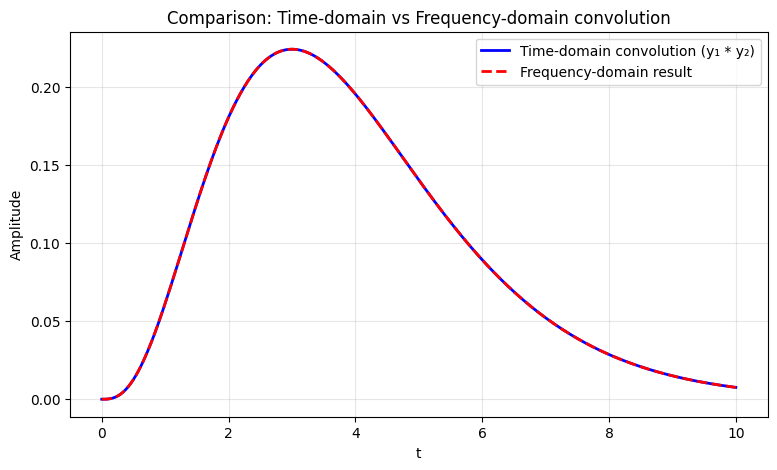

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Numeric functions
def conv_time_fn(tt):
    # (1/6) e^{-t} t^3 for t >= 0 — if symbolic matched, we can use closed form
    return (1/6)*np.exp(-tt)*(tt**3)*(tt >= 0)

def conv_freq_fn(tt):
    return (1/6)*np.exp(-tt)*(tt**3)*(tt >= 0)

tt = np.linspace(0, 10, 500)
ct = conv_time_fn(tt)
cf = conv_freq_fn(tt)

plt.figure(figsize=(9,5))
plt.plot(tt, ct, label='Time-domain convolution (y₁ * y₂)', color='blue', linewidth=2)
plt.plot(tt, cf, '--', label='Frequency-domain result', color='red', linewidth=2)
plt.title("Comparison: Time-domain vs Frequency-domain convolution")
plt.xlabel("t")
plt.ylabel("Amplitude")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

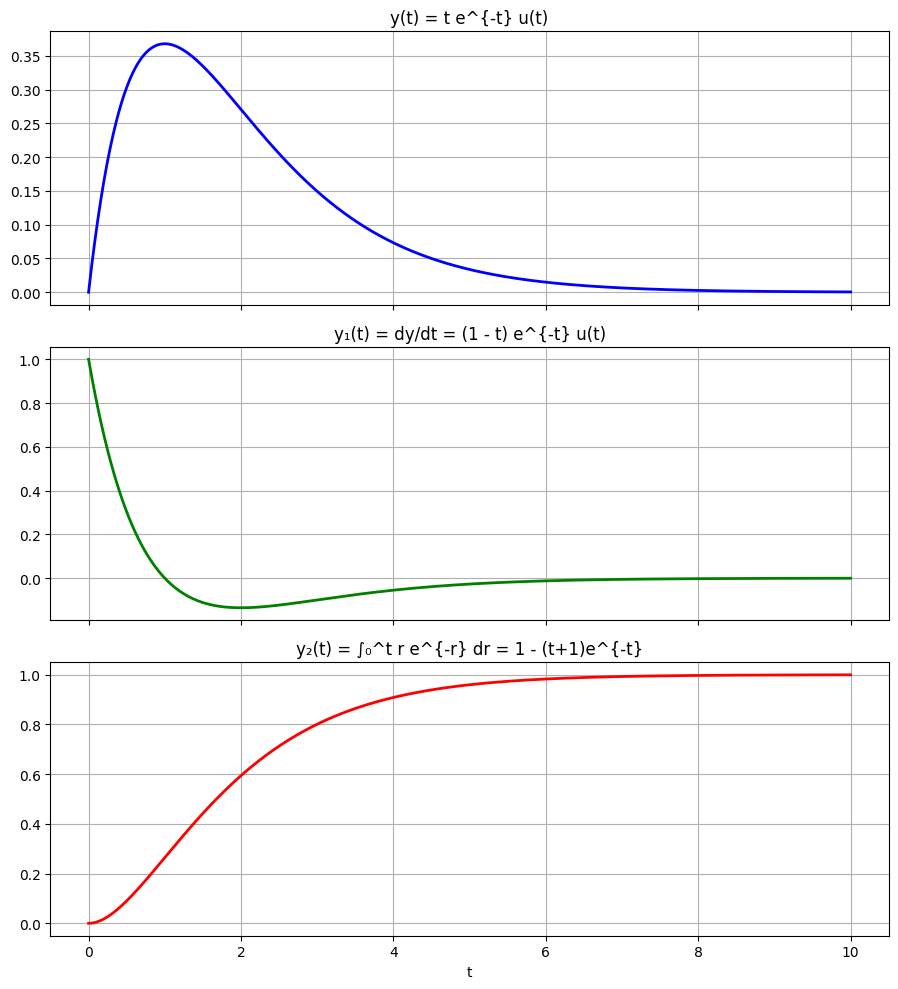

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# تعریف تابع پله واحد
def u(t):
    return np.where(t >= 0, 1.0, 0.0)

# سیگنال اصلی
def y(t):
    return t * np.exp(-t) * u(t)

# مشتق سیگنال
def y1(t):
    return (1 - t) * np.exp(-t) * u(t)

# انتگرال سیگنال
def y2(t):
    return (1 - (t + 1) * np.exp(-t)) * u(t)

# محور زمان
t = np.linspace(0, 10, 1000)

# رسم سه نمودار زیر هم
fig, axs = plt.subplots(3, 1, figsize=(9, 10), sharex=True)

axs[0].plot(t, y(t), color='blue', linewidth=2)
axs[0].set_title("y(t) = t e^{-t} u(t)")
axs[0].grid(True)

axs[1].plot(t, y1(t), color='green', linewidth=2)
axs[1].set_title("y₁(t) = dy/dt = (1 - t) e^{-t} u(t)")
axs[1].grid(True)

axs[2].plot(t, y2(t), color='red', linewidth=2)
axs[2].set_title("y₂(t) = ∫₀^t r e^{-r} dr = 1 - (t+1)e^{-t}")
axs[2].grid(True)

plt.xlabel("t")
plt.tight_layout()
plt.show()

<h3>Time-domain forms</h3>
<ul>
  <li><b>y(t):</b> t e^{-t}, for t ≥ 0</li>
  <li><b>y₁(t):</b> d/dt [t e^{-t}] = (1 - t) e^{-t}, for t ≥ 0</li>
  <li><b>y₂(t):</b> ∫_0^t r e^{-r} dr = 1 - (t+1) e^{-t}, for t ≥ 0</li>
</ul>

<h3>Convolution integral</h3>
<p>(y₁ * y₂)(t) = ∫_0^t y₁(τ) · y₂(t - τ) dτ, for t ≥ 0</p>

<h3>Closed-form result</h3>
<p>(y₁ * y₂)(t) = (1/6) e^{-t} t^3 u(t)</p>

<h3>Result Analysis</h3>
<p>Time-domain convolution yields (y₁ * y₂)(t) = (1/6) e^{-t} t^3 u(t).  
This exactly matches the frequency-domain result provided in the solution.</p>

<h3>Causality</h3>
<p>All signals are multiplied by u(t), so they are causal. The convolution integral is over [0, t], confirming causality of the result.</p>

<h3>Interpretation</h3>
<ul>
  <li><b>Growth then decay:</b> t^3 causes initial growth; e^{-t} causes exponential decay.</li>
  <li><b>Agreement across domains:</b> Time-domain and frequency-domain methods produce identical closed-form.</li>
</ul>